In [ ]:
!pip install tensorflowjs

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

try:
    df = pd.read_csv('IMDB Dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Please upload 'IMDB Dataset.csv' to your Colab environment.")
    df = None

if df is not None:

    print("\nInitial Data:")
    print(df.head())
    print("\nClass Distribution:")
    print(df['sentiment'].value_counts())

                                                                                                      # Initialize the lemmatizer and stop words
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    def preprocess_text(text):      # Pre processing function
        text = re.sub(r'<[^>]+>', '', text)
        text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
        tokens = word_tokenize(text)

        processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

        return ' '.join(processed_tokens)

                                                                                                            # Applying preprocessing function to the review column
    df['cleaned_review'] = df['review'].apply(preprocess_text)

                                                                                                                 # Displaying
    print("\nProcessed Data:")
    print(df[['cleaned_review', 'sentiment']].head())
    print("\nData preprocessing complete.")

Dataset loaded successfully!

Initial Data:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Class Distribution:
sentiment
positive    25410
negative    25388
Name: count, dtype: int64

Processed Data:
                                      cleaned_review sentiment
0  one reviewer mentioned watching oz episode hoo...  positive
1  wonderful little production filming technique ...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically family little boy jake think zombie ...  negative
4  petter mattei love time money visually stunnin...  positive

Data preprocessing complete.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


In [ ]:
from tensorflow.keras.layers import Input

In [ ]:

if 'cleaned_review' in df.columns:
                                                                                          # Converting labels to numbers (0 for negative, 1 for positive)
    df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

                                                                                          # Splitting dataset into features X and target y
    X = df['cleaned_review']
    y = df['sentiment']

                                                                                                # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                                                                                                      # Defining tokenizer parameters
    vocab_size = 10000
    embedding_dim = 128
    max_length = 100

In [ ]:
    # Initializing and fitting the tokenizer on the training set
    import json
    tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
    tokenizer.fit_on_texts(X_train)
    with open('word_index.json', 'w') as fp:
      json.dump(tokenizer.word_index, fp)

                                                                                            # Converting text to integers
    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_test_sequences = tokenizer.texts_to_sequences(X_test)

                                                                                                      # Padding sequences to a fixed length
    X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
    X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

    print("\nText tokenization and padding complete.")

                                                                                                                      #LSTM model
    from tensorflow.keras.layers import Input

    model = Sequential([
      Input(shape=(max_length,),name="input_layer"),
      Embedding(vocab_size, embedding_dim),
      LSTM(64, dropout=0.2, recurrent_dropout=0.2),
      Dense(1, activation='sigmoid')
    ])

                                                                                                                              # Compilation
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.predict(np.zeros((1, max_length)))
    model.summary()

                                                                                                                              # Training of the model
    num_epochs = 5
    batch_size = 64
    print("\nTraining LSTM model...")
    history = model.fit(X_train_padded, y_train, epochs=num_epochs, validation_data=(X_test_padded, y_test), batch_size=batch_size, verbose=1)
    print("LSTM model training complete.")
    model.save('sentiment_model.h5')


Text tokenization and padding complete.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)


Training LSTM model...
Epoch 1/5
635/635 ━━━━━━━━━━━━━━━━━━━━ 225s 348ms/step - accuracy: 0.6117 - loss: 0.6445 - val_accuracy: 0.7563 - val_loss: 0.5438
Epoch 2/5
635/635 ━━━━━━━━━━━━━━━━━━━━ 265s 352ms/step - accuracy: 0.7719 - loss: 0.5262 - val_accuracy: 0.8015 - val_loss: 0.4529
Epoch 3/5
635/635 ━━━━━━━━━━━━━━━━━━━━ 260s 349ms/step - accuracy: 0.8263 - loss: 0.4070 - val_accuracy: 0.8446 - val_loss: 0.3735
Epoch 4/5
635/635 ━━━━━━━━━━━━━━━━━━━━ 259s 343ms/step - accuracy: 0.8760 - loss: 0.3164 - val_accuracy: 0.8665 - val_loss: 0.3222
Epoch 5/5
635/635 ━━━━━━━━━━━━━━━━━━━━ 261s 342ms/step - accuracy: 0.9168 - loss: 0.2252 - val_accuracy: 0.8669 - val_loss: 0.3370


LSTM model training complete.


In [ ]:
# Convert the Keras model to TensorFlow.js format
!mkdir -p sentiment_model_js
!tensorflowjs_converter --input_format=keras sentiment_model.h5 sentiment_model_js/

2025-08-02 18:49:34.340602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754160574.361187   13988 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754160574.367058   13988 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

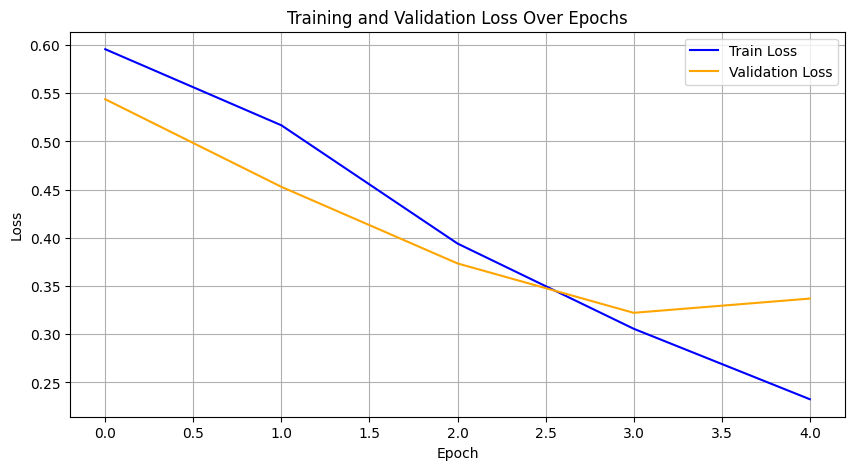

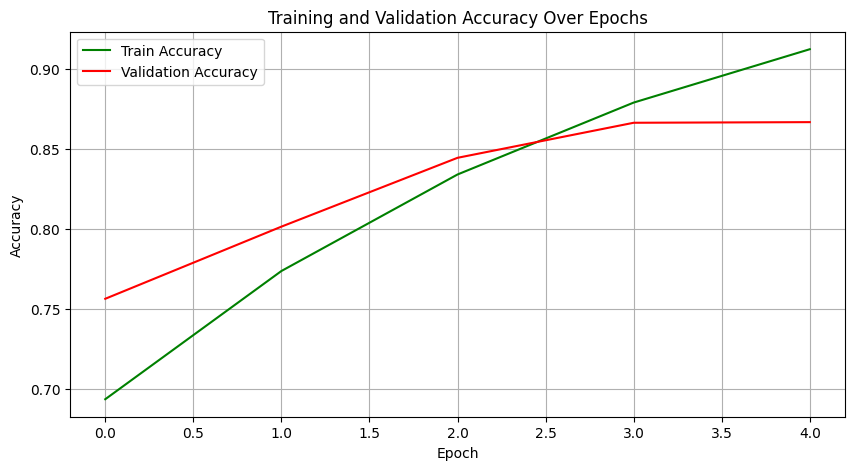

In [ ]:
                                                                                                                        # training and validation loss Graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

                                                                                                                    # Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


318/318 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step

Model Accuracy: 0.8669

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4974
           1       0.86      0.89      0.87      5186

    accuracy                           0.87     10160
   macro avg       0.87      0.87      0.87     10160
weighted avg       0.87      0.87      0.87     10160



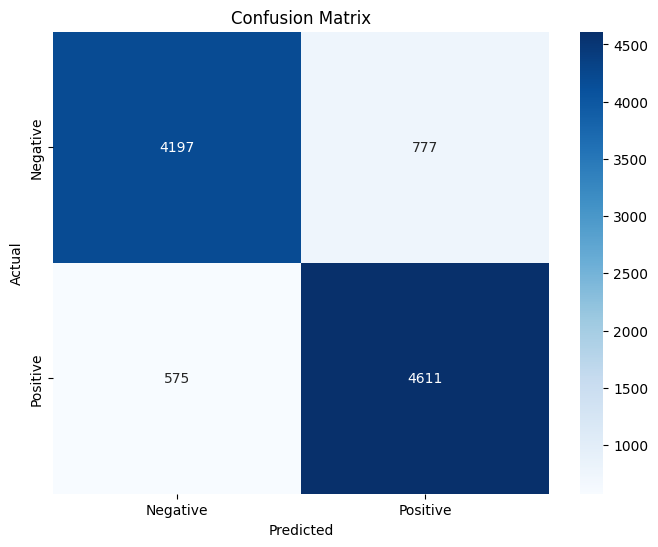

In [ ]:
    # Making predictions and evaluating the model
    y_pred_probs = model.predict(X_test_padded)
    y_pred = (y_pred_probs > 0.5).astype(int)

                                                                                                            # Calculating and printing all the metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

                                                                                                                      #confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def predict_sentiment(review_text, model, tokenizer, max_length):

    cleaned_review = preprocess_text(review_text)

    sequence = tokenizer.texts_to_sequences([cleaned_review])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

    prediction = model.predict(padded_sequence)

    sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'

    return sentiment, prediction[0][0]

                                                                                                                            # for positive
sample_review = "This movie was absolutely amazing! The acting was superb and the plot was thrilling. I highly recommend it."

predicted_sentiment, probability = predict_sentiment(sample_review, model, tokenizer, max_length)

print(f"Sample Review: '{sample_review}'")
print(f"Predicted Sentiment: {predicted_sentiment}")
print(f"Prediction Probability: {probability:.4f}")

                                                                                                                              #for negative
sample_review_negative = "This movie was absolutely crap. Do not watch it. Bad story"
predicted_sentiment_negative, probability_negative = predict_sentiment(sample_review_negative, model, tokenizer, max_length)

print(f"\nSample Review: '{sample_review_negative}'")
print(f"Predicted Sentiment: {predicted_sentiment_negative}")
print(f"Prediction Probability: {probability_negative:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Sample Review: 'This movie was absolutely amazing! The acting was superb and the plot was thrilling. I highly recommend it.'
Predicted Sentiment: Positive
Prediction Probability: 0.9794
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

Sample Review: 'This movie was absolutely crap. Do not watch it. Bad story'
Predicted Sentiment: Negative
Prediction Probability: 0.0432


In [ ]:
# Install Gradio library
!pip install gradio
import gradio as gr


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import numpy as np


def predict_sentiment(review):

    cleaned_review = preprocess_text(review)


    with open('word_index.json', 'r') as fp:
        word_index = json.load(fp)


    vocab_size = 10000
    max_length = 100
    tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
    tokenizer.word_index = word_index


    sequence = tokenizer.texts_to_sequences([cleaned_review])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

                                                                                                                # Loading model
    model = load_model('sentiment_model.h5')

                                                                                                              # prediction
    prediction = model.predict(padded_sequence)[0][0]

                                                                                                                # Return the result as a human-readable string
    if prediction > 0.5:
        return "Positive"
    else:
        return "Negative"

                                                                                                                  #Gradio interface
iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=5, placeholder="Enter a movie review here..."),
    outputs="text",
    title="Movie Review Sentiment Analysis",
    description="Enter a movie review and the model will predict if it is positive or negative."
)

# Launching
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://59056ebd84cafff975.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
